# Exercises PCA - Lecture 2

### 1.1 Calculate the covariance/correlation matrix

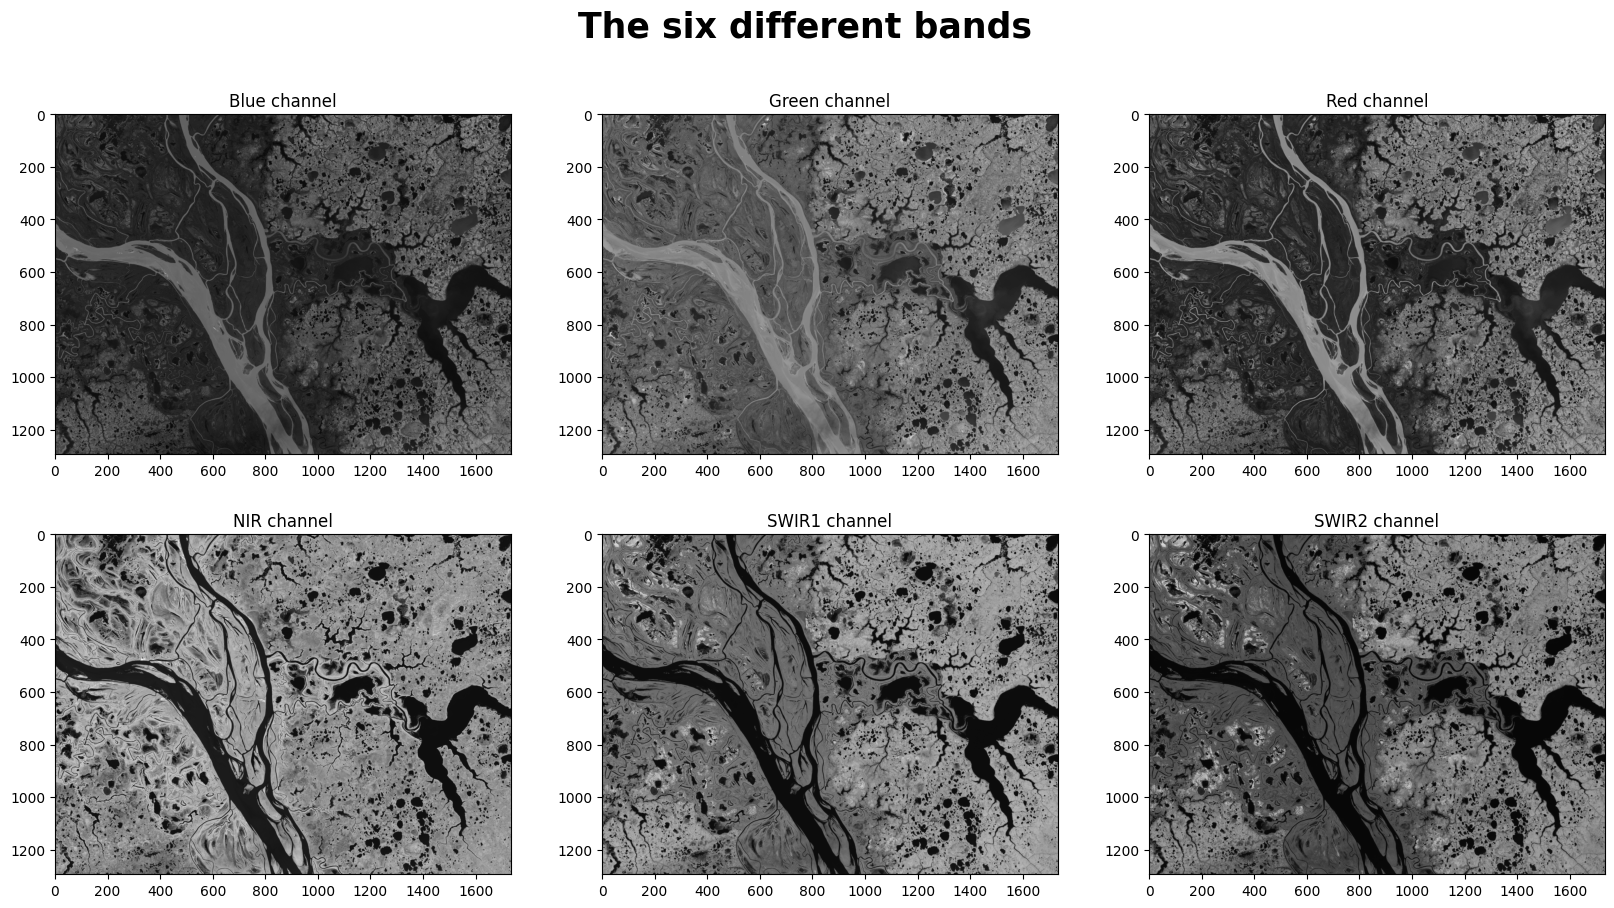

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


5.052921837195754 38.61092135310173
7.598784304145839


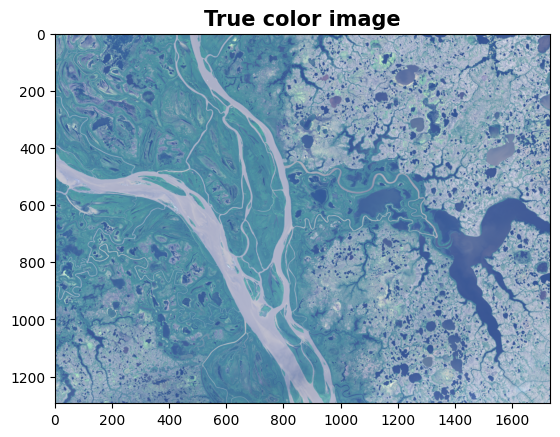

In [2]:
import numpy as np
from osgeo import gdal
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns
#from skimage import exposure
import cv2

dataset = gdal.Open(r'yukon.tif')

# since there are 6 bands
# we store in 6 different variables
band1 = dataset.GetRasterBand(1) # Blue channel
band2 = dataset.GetRasterBand(2) # Red channel
band3 = dataset.GetRasterBand(3) # Green channel
band4 = dataset.GetRasterBand(4) # NIR channel
band5 = dataset.GetRasterBand(5) # SWIR1 channel
band6 = dataset.GetRasterBand(6) # SWIR2 channel
b1 = band1.ReadAsArray()
b2 = band2.ReadAsArray()
b3 = band3.ReadAsArray()
b4 = band4.ReadAsArray()
b5 = band5.ReadAsArray()
b6 = band6.ReadAsArray()

# Plot the different bands in colormap
fig, ((ax1, ax2, ax3), (ax4, ax5, ax6)) = plt.subplots(2,3,figsize=(20,10))
fig.suptitle('The six different bands', fontsize=25, fontweight='bold')

ax1.imshow(b1, cmap='gray')
ax1.set_title('Blue channel')

ax2.imshow(b2, cmap='gray')
ax2.set_title('Green channel')

ax3.imshow(b3, cmap='gray')
ax3.set_title('Red channel')

ax4.imshow(b4, cmap='gray')
ax4.set_title('NIR channel')

ax5.imshow(b5, cmap='gray')
ax5.set_title('SWIR1 channel')

ax6.imshow(b6, cmap='gray')
ax6.set_title('SWIR2 channel')

plt.show()

# transform b1 into a array of 1 dimension
b1_a = np.reshape(b1, (b1.shape[0]*b1.shape[1]))
b2_a = np.reshape(b2, (b2.shape[0]*b2.shape[1]))
b3_a = np.reshape(b3, (b3.shape[0]*b3.shape[1]))
b4_a = np.reshape(b4, (b4.shape[0]*b4.shape[1]))
b5_a = np.reshape(b5, (b5.shape[0]*b5.shape[1]))
b6_a = np.reshape(b6, (b6.shape[0]*b6.shape[1]))

# stack the 6 bands in a single matrix
bands = np.column_stack((b1_a, b2_a, b3_a, b4_a, b5_a, b6_a))

# true image
real_img = np.stack((b3, b2, b1), axis=-1)
min_val = np.min(real_img)*255
max_val = np.max(real_img)*255

print(min_val, max_val)
const = 255/(max_val - min_val)
print(const)
real_img = const * (real_img)
plt.imshow(real_img)
plt.title('True color image', fontsize=15, fontweight='bold')
plt.show()


# compute the covariance matrix of the 6 bands
covariance_matrix = np.cov(bands.T)



## 1.2 Calculate principal components of the six spectral bands

[[ 0.4155205   0.45363447  0.39885205  0.3040633   0.42460006  0.43558645]
 [ 0.41971335  0.22927086  0.4639331  -0.5692992  -0.37912363 -0.29699367]
 [-0.01050036  0.46222824 -0.06067403  0.62633944 -0.33264288 -0.5287727 ]
 [-0.6723252   0.6173171   0.03514049 -0.29127368 -0.09928949  0.26639163]
 [ 0.4258905   0.3591597  -0.7877486  -0.24656948  0.02688509  0.08691494]
 [ 0.13292533 -0.1338627  -0.01479609  0.21332042 -0.7448137   0.60327417]]


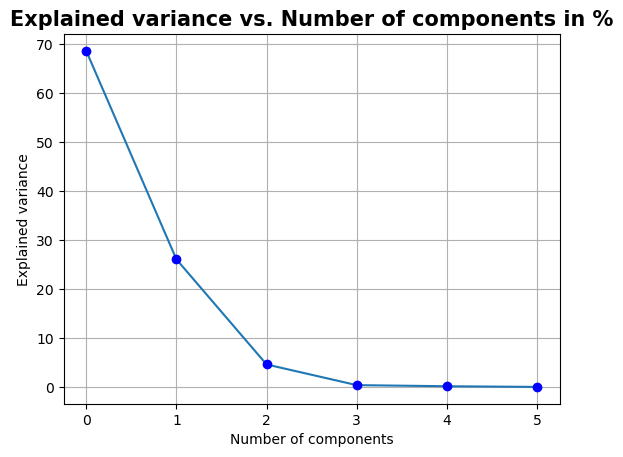

In [19]:
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
bands_scaled = scaler.fit_transform(bands)

pca = PCA(n_components=6)
princ_comp = pca.fit_transform(bands_scaled)

# print variants of components
variants_ratio = pca.explained_variance_ratio_
#print(pca.explained_variance_ratio_ * 100)

# print the components
components = pca.components_
print(pca.components_)

# plot the components
plt.plot(pca.explained_variance_ratio_ * 100)
plt.xlabel('Number of components')
plt.ylabel('Explained variance')
plt.title('Explained variance vs. Number of components in %', fontsize=15, fontweight='bold')
plt.plot(pca.explained_variance_ratio_ * 100, 'bo')
plt.grid()
plt.show()



### 1.3 List singular or eigen values and corresponding eigenvectors and display the images of transposed data (PC-Data)

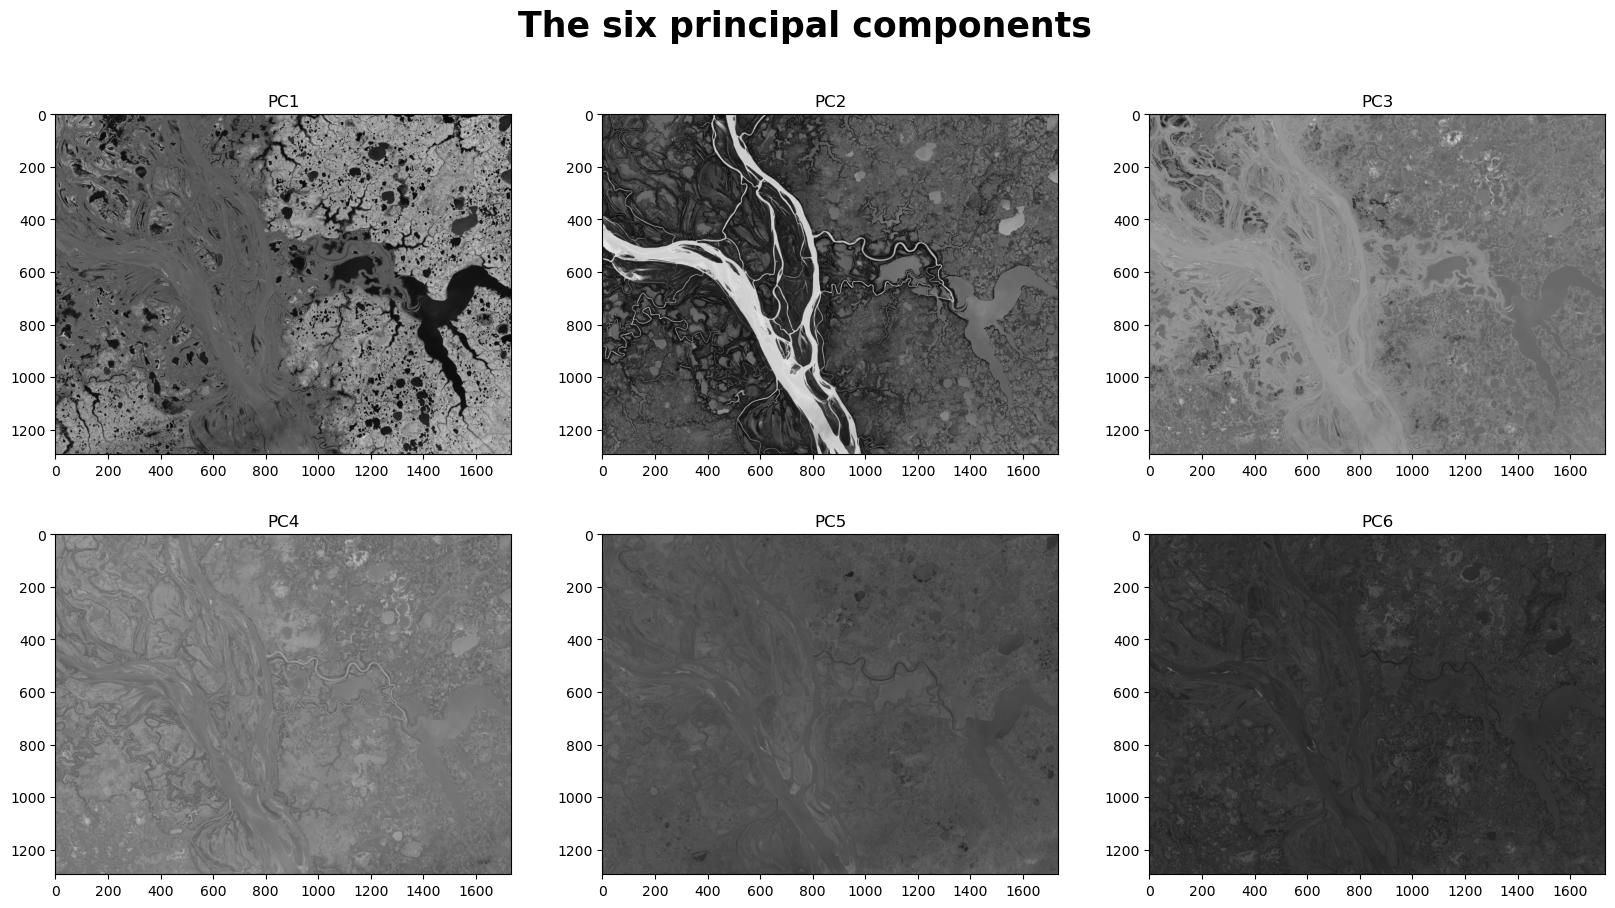

In [20]:
# list eigenvalues
eigenvalues = pca.explained_variance_
#list eigenvectors
eigenvectors = princ_comp

# Data can be projected onto the PCA space by using the dot-product

projected_data = pca.transform(bands_scaled)
pc_proj = projected_data

#reshape the projected data
pc_proj = np.reshape(pc_proj, (b1.shape[0], b1.shape[1], -1))

# plot the results

# Plot the different components in grayscale
fig, ((ax1, ax2, ax3), (ax4, ax5, ax6)) = plt.subplots(2,3,figsize=(20,10))
fig.suptitle('The six principal components', fontsize=25, fontweight='bold')

ax1.imshow(pc_proj[:,:,0], cmap='gray')
ax1.set_title('PC1')

ax2.imshow(pc_proj[:,:,1], cmap='gray')
ax2.set_title('PC2')

ax3.imshow(pc_proj[:,:,2], cmap='gray')
ax3.set_title('PC3')

ax4.imshow(pc_proj[:,:,3], cmap='gray')
ax4.set_title('PC4')

ax5.imshow(pc_proj[:,:,4], cmap='gray')
ax5.set_title('PC5')

ax6.imshow(pc_proj[:,:,5], cmap='gray')
ax6.set_title('PC6')

plt.show()



### 1.4 Calculate the covariance matrix of PC scores and compare with eigenvalues

In [21]:
# Calculate the covariance matrix of PC scores
#covariance_matrix = np.cov(pc_proj[:,:,0].T)
#print(covariance_matrix.shape)
#print(eigenvectors.shape)

### 1.5 Create a false color composite of the first 3 PCs, what do you see?


Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


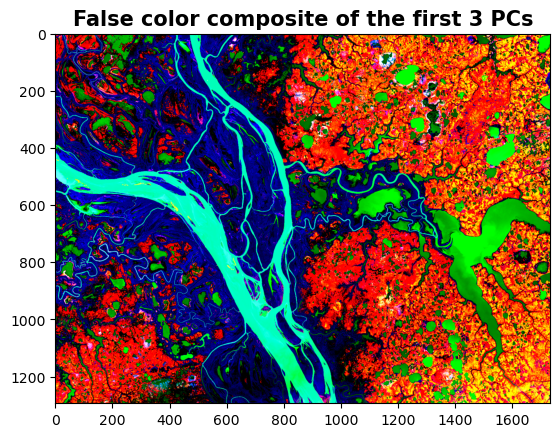

In [22]:

RGB = np.stack((pc_proj[:,:,0], pc_proj[:,:,1], pc_proj[:,:,2]), axis=-1)
plt.title('False color composite of the first 3 PCs', fontsize=15, fontweight='bold')
plt.imshow(RGB)

### 1.6 How much of the variance is described by the first 3 components?

In [23]:
tot = variants_ratio[0] + variants_ratio[1] + variants_ratio[2]
print(tot*100, "%")

99.32415048961292 %


### 1.7 Plot histograms of the PC data, what do you see?

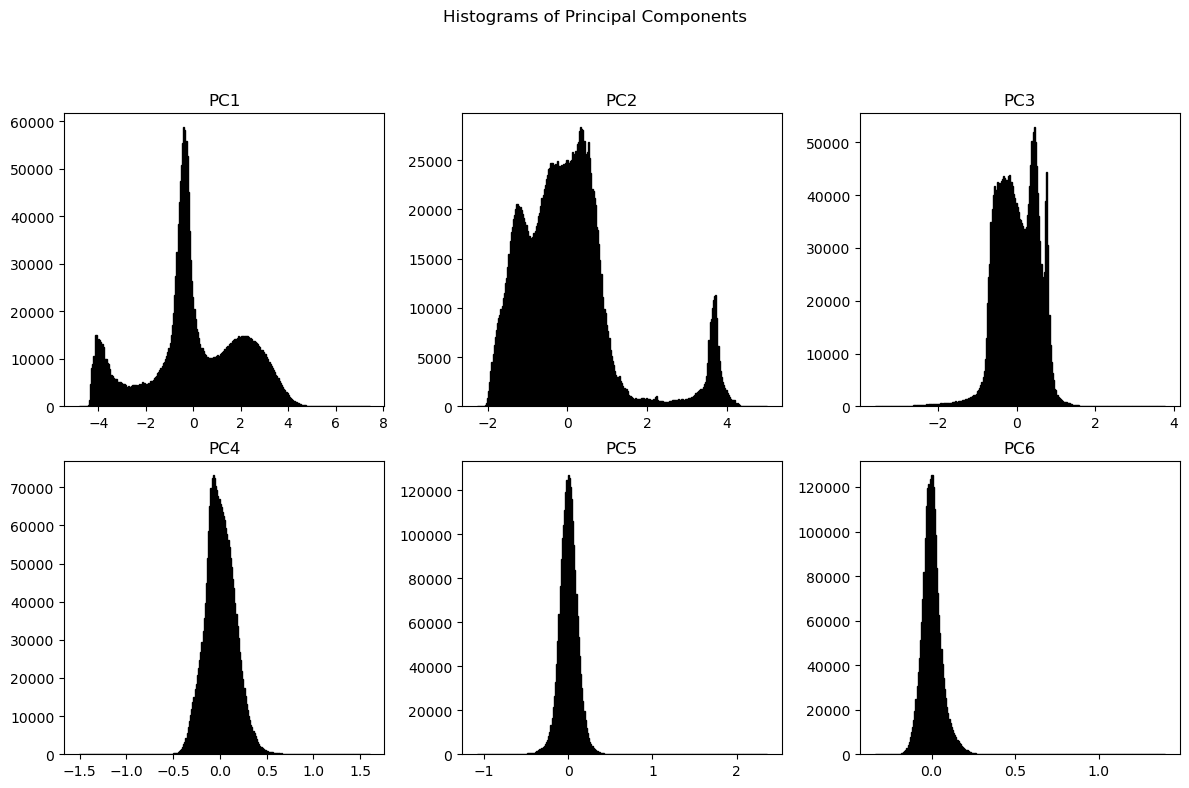

In [24]:
#plot histograms of pc_proj

# Create a figure with subplots
fig, axs = plt.subplots(2, 3, figsize=(12, 8))
fig.suptitle('Histograms of Principal Components')

# Plot each histogram in a subplot
for i in range(6):
    row, col = divmod(i, 3)  # Calculate the row and column for the subplot
    ax = axs[row, col]  # Get the current subplot
    ax.hist(pc_proj[:, :, i].ravel(), bins=256, fc='k', ec='k')
    ax.set_title(f'PC{i + 1}')

# Adjust spacing between subplots
plt.tight_layout()
plt.subplots_adjust(top=0.85)

# Show the combined figure
plt.show()

### 1.8 Which band is PC2 dominated by and how is this seen in the images of PC2. Hence, which surface type is maily shown?

In [25]:
print(components[:,1])

[ 0.45363447  0.22927086  0.46222824  0.6173171   0.3591597  -0.1338627 ]


# Exercise of change detection - wild fire

In [1]:
pre_fire = gdal.Open(r'L8pre.tif')
post_fire = gdal.Open(r'L8burn.tif')


band1 = pre_fire.GetRasterBand(1) 
band2 = pre_fire.GetRasterBand(2)
band3 = pre_fire.GetRasterBand(3)
band4 = pre_fire.GetRasterBand(4)

b1 = band1.ReadAsArray()
b2 = band2.ReadAsArray()
b3 = band3.ReadAsArray()
b4 = band4.ReadAsArray()


# transform b1 into a array of 1 dimension
b1_a = np.reshape(b1, (b1.shape[0]*b1.shape[1]))
b2_a = np.reshape(b2, (b2.shape[0]*b2.shape[1]))
b3_a = np.reshape(b3, (b3.shape[0]*b3.shape[1]))
b4_a = np.reshape(b4, (b4.shape[0]*b4.shape[1]))

print(b1_a.min())

# stack the 6 bands in a single matrix
bands_pre = np.column_stack((b1_a, b2_a, b3_a, b4_a))

# true image
real_img_pre = np.stack((b3, b2, b1), axis=-1)
min_val = np.min(real_img_pre)*255
max_val = np.max(real_img_pre)*255

const = 255/(max_val - min_val)

real_img_pre = const * (real_img_pre)
plt.imshow(real_img_pre)
plt.title('Before Fire', fontsize=15, fontweight='bold')
plt.show()



# ----------------- POST FIRE ----------------- #

band1 = post_fire.GetRasterBand(1) 
band2 = post_fire.GetRasterBand(2)
band3 = post_fire.GetRasterBand(3)
band4 = post_fire.GetRasterBand(4)

b1 = band1.ReadAsArray()
b2 = band2.ReadAsArray()
b3 = band3.ReadAsArray()
b4 = band4.ReadAsArray()

# transform into a array of 1 dimension
b1_a = np.reshape(b1, (b1.shape[0]*b1.shape[1]))
b2_a = np.reshape(b2, (b2.shape[0]*b2.shape[1]))
b3_a = np.reshape(b3, (b3.shape[0]*b3.shape[1]))
b4_a = np.reshape(b4, (b4.shape[0]*b4.shape[1]))

# stack the 4 bands in a single matrix
bands_post = np.column_stack((b1_a, b2_a, b3_a, b4_a))


# true image
real_img_post = np.stack((b3, b2, b1), axis=-1)
min_val = np.min(real_img_post)*255
max_val = np.max(real_img_post)*255
const = 255/(max_val - min_val)
real_img_post = const * (real_img_post)

# plot the results

# Plot the different components in grayscale

plt.imshow(real_img_post)
plt.title('After Fire', fontsize=15, fontweight='bold')
plt.show()





# ----------------- Combine the 2 dataset ----------------- #

# combine the 2 dataset so that it has 8 columns
bands = np.column_stack((bands_pre, bands_post))



NameError: name 'gdal' is not defined

### Perform PCA

In [27]:
""" # PCA

# ----------------------- PRE FIRE ----------------------
scaler = StandardScaler()
bands_scaled = scaler.fit_transform(bands_pre)

pca = PCA(n_components=4)
pca.fit(bands_scaled)

# print variants of components
variants_ratio_pre = pca.explained_variance_ratio_
print(pca.explained_variance_ratio_ * 100)

# print the components
components_pre = pca.components_
print(pca.components_)

# Data can be projected onto the PCA space by using the dot-product
projected_data_pre = pca.transform(bands_scaled)
projected_data_pre = np.reshape(projected_data_pre, (b1.shape[0], b1.shape[1], -1))


# ----------------------- POST  FIRE ----------------------
scaler = StandardScaler()
bands_scaled = scaler.fit_transform(bands_post)

pca = PCA(n_components=4)
pca.fit(bands_post)

# print variants of components
variants_ratio_post = pca.explained_variance_ratio_
print(pca.explained_variance_ratio_ * 100)

# print the components
components_post = pca.components_
print(pca.components_)

# Data can be projected onto the PCA space by using the dot-product
projected_data_post = pca.transform(bands_scaled)
projected_data_post = np.reshape(projected_data_post, (b1.shape[0], b1.shape[1], -1))


 """

' # PCA\n\n# ----------------------- PRE FIRE ----------------------\nscaler = StandardScaler()\nbands_scaled = scaler.fit_transform(bands_pre)\n\npca = PCA(n_components=4)\npca.fit(bands_scaled)\n\n# print variants of components\nvariants_ratio_pre = pca.explained_variance_ratio_\nprint(pca.explained_variance_ratio_ * 100)\n\n# print the components\ncomponents_pre = pca.components_\nprint(pca.components_)\n\n# Data can be projected onto the PCA space by using the dot-product\nprojected_data_pre = pca.transform(bands_scaled)\nprojected_data_pre = np.reshape(projected_data_pre, (b1.shape[0], b1.shape[1], -1))\n\n\n# ----------------------- POST  FIRE ----------------------\nscaler = StandardScaler()\nbands_scaled = scaler.fit_transform(bands_post)\n\npca = PCA(n_components=4)\npca.fit(bands_post)\n\n# print variants of components\nvariants_ratio_post = pca.explained_variance_ratio_\nprint(pca.explained_variance_ratio_ * 100)\n\n# print the components\ncomponents_post = pca.components_\n

In [28]:
# # plot the results

# fig, axs = plt.subplots(2, 2, figsize=(12, 8))
# fig.suptitle('Pre Fire Bands', fontsize=25, fontweight='bold')

# for i in range(4):
#     row, col = divmod(i, 2)  # Calculate the row and column for the subplot
#     ax = axs[row, col]  # Get the current subplot
#     ax.imshow(projected_data_pre[:,:,i], cmap='gray')
#     ax.set_title(f'PC{i + 1}')

# # Adjust spacing between subplots
# plt.tight_layout()
# plt.subplots_adjust(top=0.85)

# # Show the combined figure
# plt.show()

# # POST FIRE
# # Data can be projected onto the PCA space by using the dot-product
# eigenvectors = components_post
# pc_proj = eigenvectors.dot(bands_post.T)

# #reshape the projected data
# pc_proj = np.reshape(pc_proj.T, (b1.shape[0], b1.shape[1], 4))

# # plot the results

# fig, axs = plt.subplots(2, 2, figsize=(12, 8))
# fig.suptitle('Post Fire Bands', fontsize=25, fontweight='bold')

# # # for i in range(4):
# # #     row, col = divmod(i, 2)  # Calculate the row and column for the subplot
# # #     ax = axs[row, col]  # Get the current subplot
# # #     ax.imshow(projected_data_post[:,:,i], cmap='gray')
# # #     ax.set_title(f'PC{i + 1}')

# # # # Adjust spacing between subplots
# # # plt.tight_layout()
# # # plt.subplots_adjust(top=0.85)

# # # # Show the combined figure
# # # plt.show()

 

[6.72439020e+01 2.42926869e+01 7.41440674e+00 9.11808534e-01
 8.21223411e-02 2.61788411e-02 1.75308911e-02 1.13637874e-02]
[[ 0.01208183  0.04453406  0.03482185  0.6095444  -0.01425121  0.02297285
  -0.01903844  0.78994983]
 [ 0.01569477  0.05712782  0.03414005  0.7541274   0.11265783  0.10416169
   0.25427848 -0.58173686]
 [ 0.11851045  0.14583987  0.22692364 -0.24065682  0.33843982  0.45896012
   0.7066177   0.17544791]
 [ 0.3169338   0.45801637  0.7725504  -0.00806465 -0.10031861 -0.15201001
  -0.23645583 -0.06158822]
 [ 0.23800538  0.19445606 -0.22265351  0.01216915  0.4293285   0.58009964
  -0.57757604 -0.03722271]
 [ 0.6073759  -0.31458515 -0.07330979  0.00933221  0.52215856 -0.4998853
   0.05697403  0.02980664]
 [ 0.3798617   0.6396144  -0.53991324 -0.02942752 -0.2985487  -0.15019776
   0.20606247  0.00858686]
 [ 0.5614882  -0.4667136   0.05327815  0.02580636 -0.56249094  0.38198313
   0.02141575 -0.02527796]]


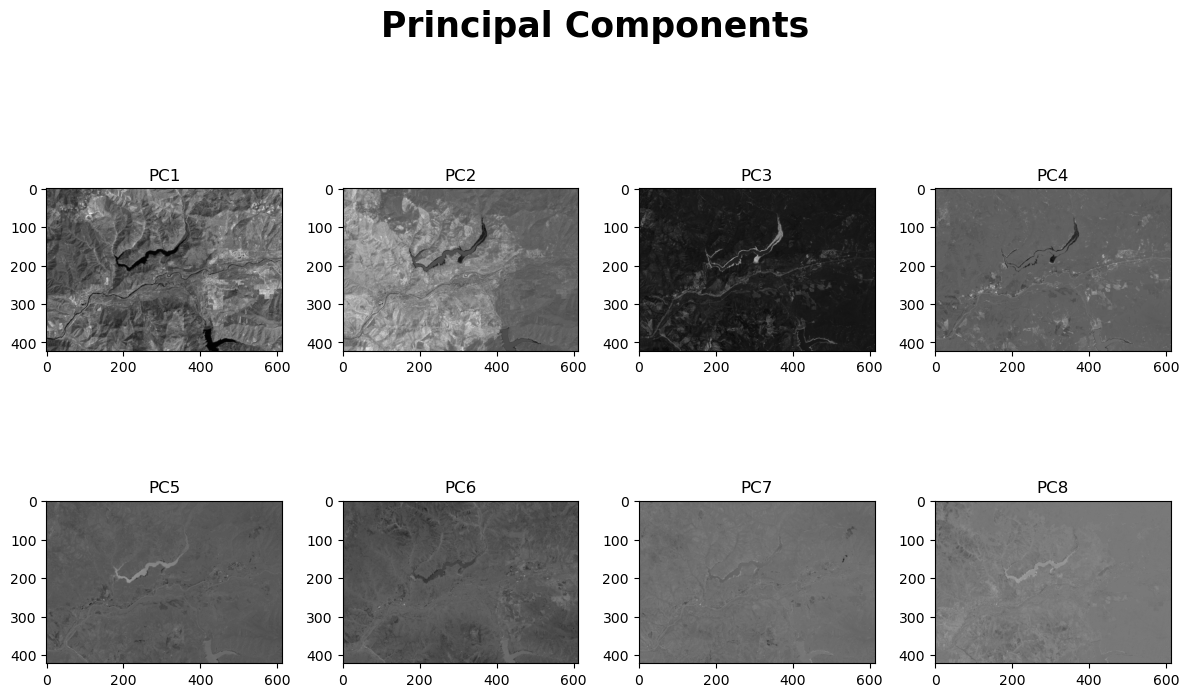

In [29]:
# PCA on the combined dataset

scaler = StandardScaler()
bands_scaled = scaler.fit_transform(bands)

pca = PCA(n_components=8)
pca.fit(bands)

# print variants of components
variants_ratio = pca.explained_variance_ratio_
print(pca.explained_variance_ratio_ * 100)

# print the components
components = pca.components_
print(pca.components_)

# Data can be projected onto the PCA space by using the dot-product
projected_data = pca.transform(bands)
projected_data = np.reshape(projected_data, (b1.shape[0], b1.shape[1], -1))

# plot the results

fig, axs = plt.subplots(2, 4, figsize=(12, 8))
fig.suptitle('Principal Components', fontsize=25, fontweight='bold')

for i in range(8):
    row, col = divmod(i, 4)  # Calculate the row and column for the subplot
    ax = axs[row, col]  # Get the current subplot
    ax.imshow(projected_data[:,:,i], cmap='gray')
    ax.set_title(f'PC{i + 1}')

# Adjust spacing between subplots
plt.tight_layout()
plt.subplots_adjust(top=0.9)

# Show the combined figure
plt.show()


Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


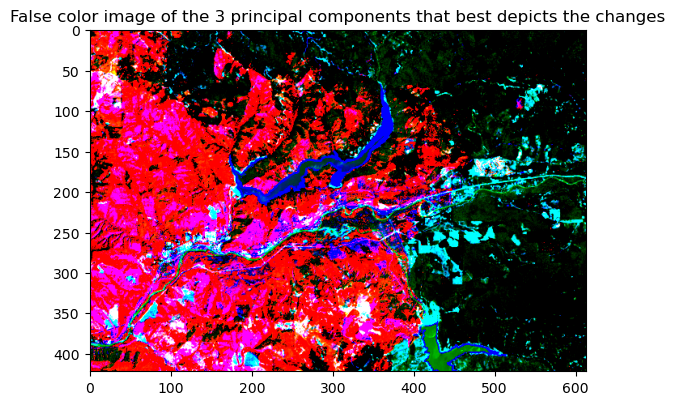

In [30]:
""" RGB_pre = np.stack((projected_data_pre[:,:,0], projected_data_pre[:,:,1], projected_data_pre[:,:,2]), axis=-1)
RGB_post = np.stack((projected_data_post[:,:,1], projected_data_post[:,:,0], projected_data_post[:,:,2]), axis=-1)

plt.imshow(RGB_pre)
plt.title('Pre Fire')
plt.show()
plt.imshow(RGB_post)
plt.title('Post Fire')
plt.show()
 """

# Make a false color image of the 3 principal components
RGB = np.stack((projected_data[:,:,1], projected_data[:,:,3], projected_data[:,:,2]), axis=-1)*50

plt.imshow(RGB)
plt.title('False color image of the 3 principal components that best depicts the changes')
plt.show()


# PCA on a selected image Sentinel-2

In [31]:
pre_ref = gdal.Open(r'1986.tif')
post_ref = gdal.Open(r'2023.tif')

print(pre_ref.RasterCount)

band1 = pre_ref.GetRasterBand(1) 
band2 = pre_ref.GetRasterBand(2)
band3 = pre_ref.GetRasterBand(3)

b1 = band1.ReadAsArray() # Red channel
b2 = band2.ReadAsArray() # Green channel
b3 = band3.ReadAsArray() # Blue channel

# transform b1 into a array of 1 dimension
b1_a = np.reshape(b1, (b1.shape[0]*b1.shape[1]))
b2_a = np.reshape(b2, (b2.shape[0]*b2.shape[1]))
b3_a = np.reshape(b3, (b3.shape[0]*b3.shape[1]))

# stack the 3 bands in a single matrix
bands_pre = np.column_stack((b1_a, b2_a, b3_a))

# true image
real_img_pre = np.stack((b1, b2, b3), axis=-1)

min_val = np.min(real_img_pre, axis=(0, 1))
max_val = np.max(real_img_pre, axis=(0, 1))

scaled_image_pre = ((real_img_pre - min_val) / (max_val - min_val) * 255).astype(np.uint8)

print(scaled_image_pre.min(), scaled_image_pre.max())

plt.imshow(scaled_image_pre)
plt.title('Rio Capim 1986', fontsize=15, fontweight='bold')
plt.show()

# ----------------- POST Reforestation ----------------- #

band1 = post_ref.GetRasterBand(1) 
band2 = post_ref.GetRasterBand(2)
band3 = post_ref.GetRasterBand(3)

b1 = band1.ReadAsArray()
b2 = band2.ReadAsArray()
b3 = band3.ReadAsArray()

# transform into a array of 1 dimension
b1_a = np.reshape(b1, (b1.shape[0]*b1.shape[1]))
b2_a = np.reshape(b2, (b2.shape[0]*b2.shape[1]))
b3_a = np.reshape(b3, (b3.shape[0]*b3.shape[1]))

# stack the 3 bands in a single matrix
bands_post = np.column_stack((b1_a, b2_a, b3_a))

# true image
real_img_post = np.stack((b1, b2, b3), axis=-1)

min_val = np.min(real_img_post, axis=(0, 1))
max_val = np.max(real_img_post, axis=(0, 1))

scaled_image = ((real_img_post - min_val) / (max_val - min_val) * 255).astype(np.uint8)

print(scaled_image.min(), scaled_image.max() 
      
plt.imshow(scaled_image)
plt.title('Rio Capim 2023', fontsize=15, fontweight='bold')
plt.show()



SyntaxError: '(' was never closed (1567351173.py, line 62)

[9.58102305e+01 2.89582107e+00 1.29394815e+00 2.39471360e-07
 1.02643112e-08 5.38788693e-09]
[[ 6.79580947e-01  5.64279652e-01  4.68783757e-01  1.77085119e-05
   1.33858155e-05  7.76196119e-06]
 [-7.26036250e-01  4.25809149e-01  5.39961041e-01 -5.54912791e-05
  -4.01386867e-05 -2.44012605e-05]
 [ 1.05076625e-01 -7.07301234e-01  6.99059259e-01 -1.03082700e-04
  -8.38768051e-05 -4.47770412e-05]
 [-5.40087024e-05 -8.14844392e-05  1.26216733e-04  7.46484909e-01
   5.78048344e-01  3.29576042e-01]
 [ 2.14714748e-06 -3.09746530e-06  1.16765627e-06 -6.07283010e-01
   7.94289955e-01 -1.76298969e-02]
 [-4.74839821e-07  1.20790316e-06 -7.82414703e-07 -2.71969875e-01
  -1.86985481e-01  9.43964415e-01]]


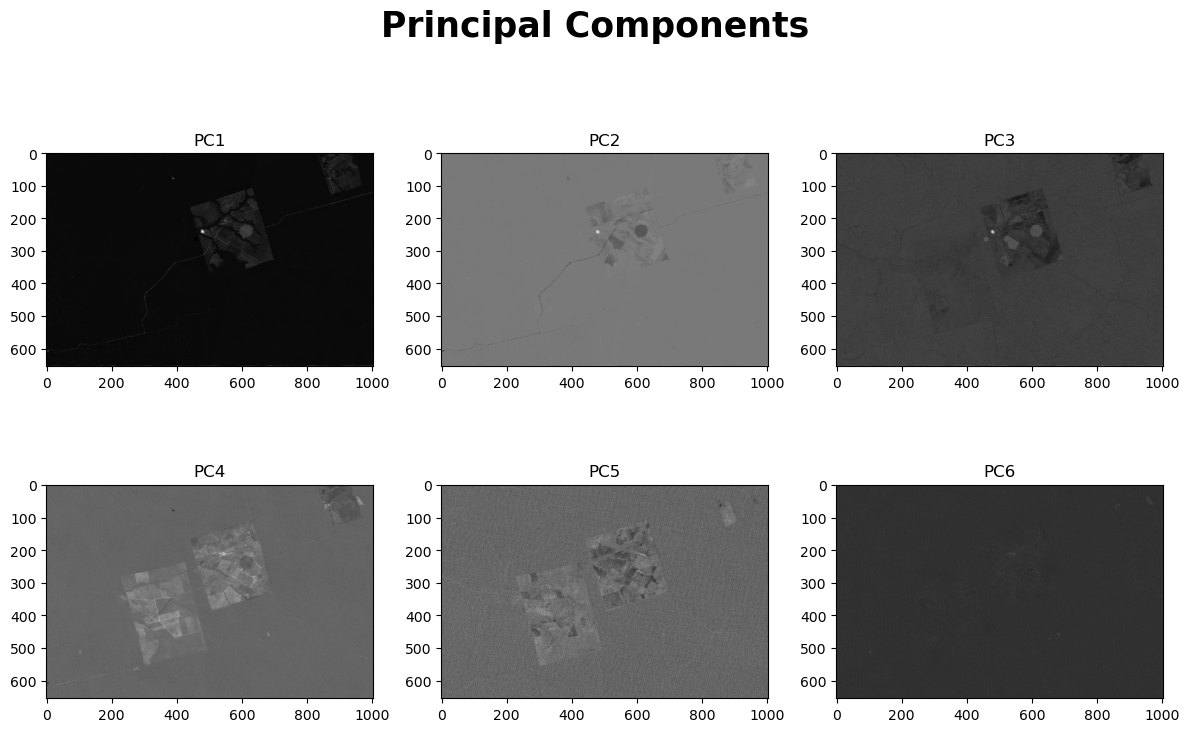

In [ ]:

# ----------------- Combine the 2 dataset ----------------- #

# combine the 2 dataset so that it has 8 columns
bands = np.column_stack((bands_post, bands_pre))

# PCA on the combined dataset

scaler = StandardScaler()
bands_scaled = scaler.fit_transform(bands)

pca = PCA(n_components=6)
pca.fit(bands)

# print variants of components
variants_ratio = pca.explained_variance_ratio_
print(pca.explained_variance_ratio_ * 100)

# print the components
components = pca.components_
print(pca.components_)

# Data can be projected onto the PCA space by using the dot-product
projected_data = pca.transform(bands)
projected_data = np.reshape(projected_data, (b1.shape[0], b1.shape[1], -1))

# plot the results

fig, axs = plt.subplots(2, 3, figsize=(12, 8))
fig.suptitle('Principal Components', fontsize=25, fontweight='bold')

for i in range(6):
    row, col = divmod(i, 3)  # Calculate the row and column for the subplot
    ax = axs[row, col]  # Get the current subplot
    ax.imshow(projected_data[:,:,i], cmap='gray')
    ax.set_title(f'PC{i + 1}')

# Adjust spacing between subplots
plt.tight_layout()
plt.subplots_adjust(top=0.9)

# Show the combined figure
plt.show()


In [ ]:
# Make a false color image of the 3 principal components that more depict the changes
RGB = np.stack((projected_data[:,:,1], projected_data[:,:,3], projected_data[:,:,2]), axis=-1)

plt.imshow(RGB)
plt.title('False color image of the 3 principal components that best depicts the changes')
plt.show()

NameError: name 'np' is not defined